## Advanced House Price Predictions- Kaggle

#### Import Necessary Libraries

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
features_with_na = train_df.isnull().mean()[train_df.isnull().mean()!=0]

features_with_na.index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

LotFrontage


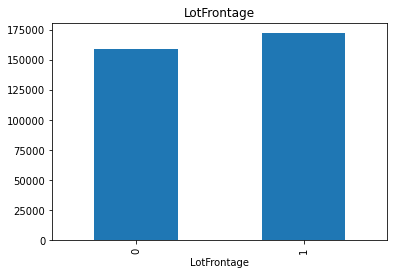

Alley


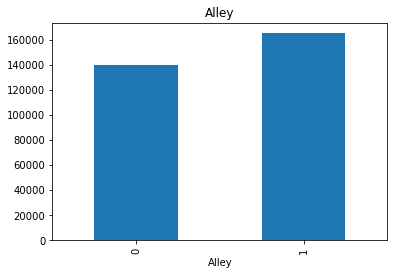

MasVnrType


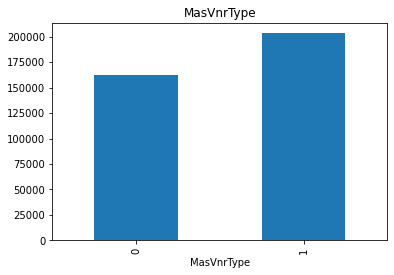

MasVnrArea


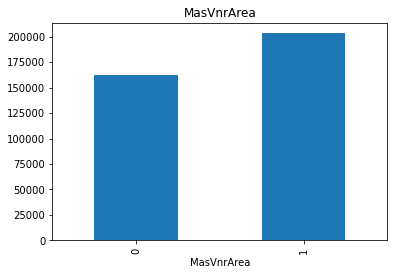

BsmtQual


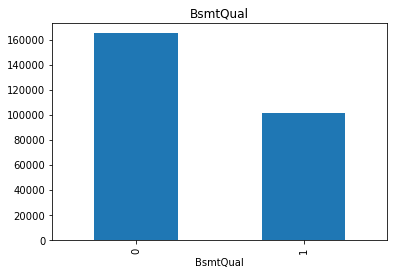

BsmtCond


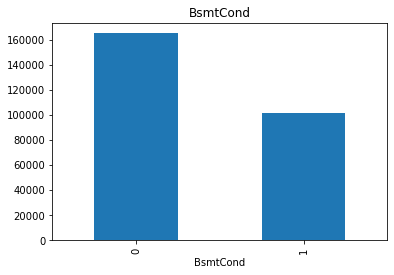

BsmtExposure


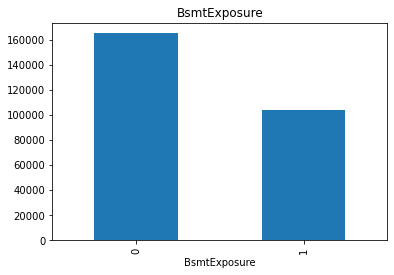

BsmtFinType1


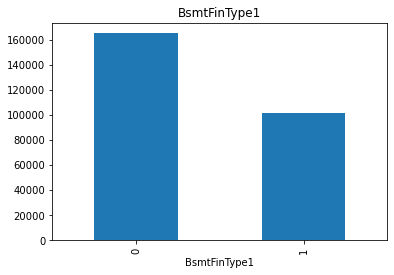

BsmtFinType2


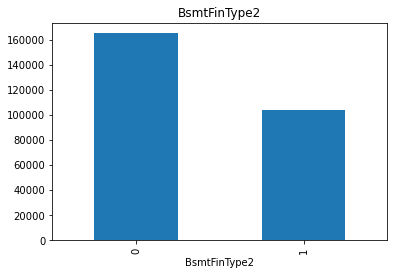

Electrical


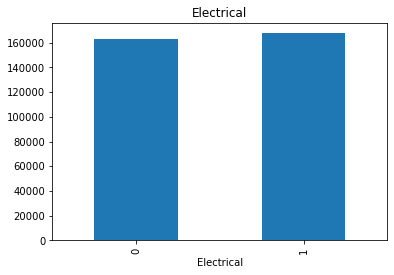

FireplaceQu


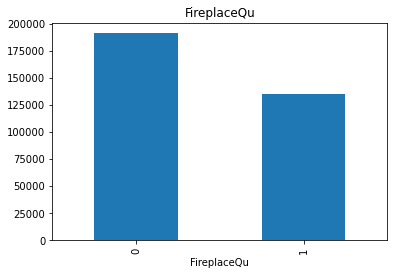

GarageType


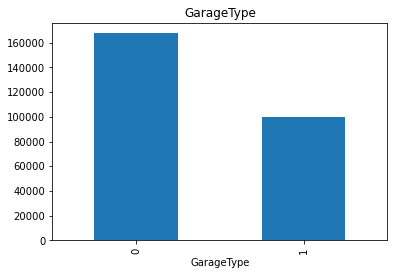

GarageYrBlt


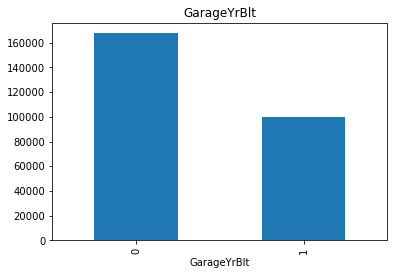

GarageFinish


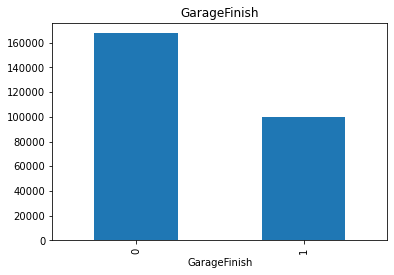

GarageQual


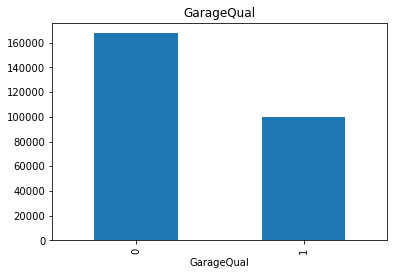

GarageCond


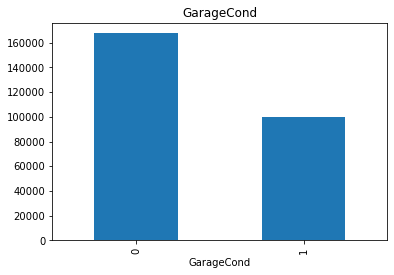

PoolQC


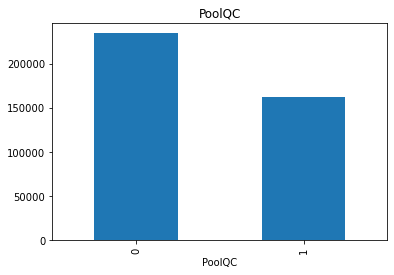

Fence


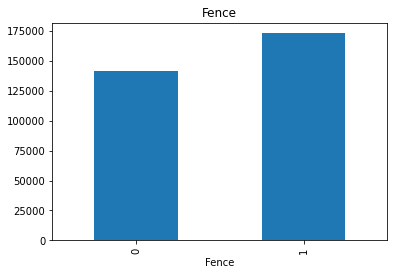

MiscFeature


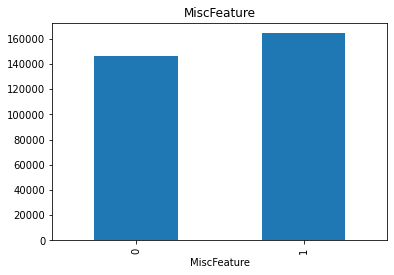

In [17]:
for feature in features_with_na.index:
    print(feature)
    data = train_df.copy()
    
    data[feature] = np.where(data[feature].isna(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here we can see there some relationship between null values and House price, we should feature engineering to replace null values

In [21]:
numercal_col = train_df.select_dtypes(np.number).columns

print('No of Numerical Variables', len(numercal_col))

train_df[numercal_col]

No of Numerical Variables 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


##### to take year columns out

In [22]:
year_col = [features for features in train_df.columns if 'Yr' in features or 'Year' in features]

In [26]:
for i in year_col:
    print(i,'\n')
    print(train_df[i].unique())
    print('No of unique year', train_df[i].nunique())

YearBuilt 

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
No of unique year 112
YearRemodAdd 

[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
No of unique year 61
GarageYrBlt 

[2003. 1976. 2001. 1998. 2000. 1993.

Text(0.5, 1.0, 'Year Sold vs House Sold Price')

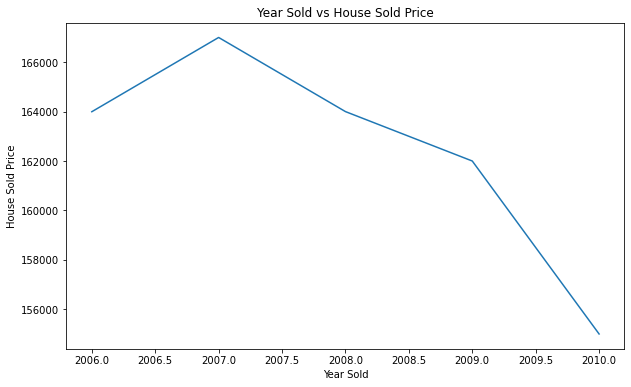

In [32]:
# Lets analyse based on the datetime variable
plt.figure(figsize=(10,6))
train_df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('House Sold Price')
plt.title('Year Sold vs House Sold Price')

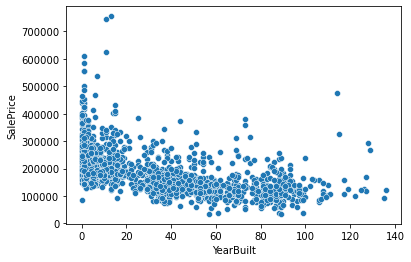

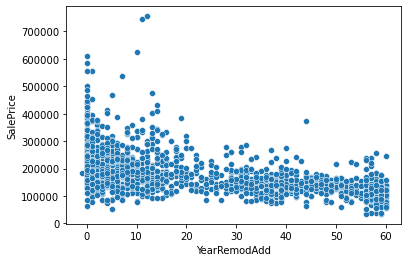

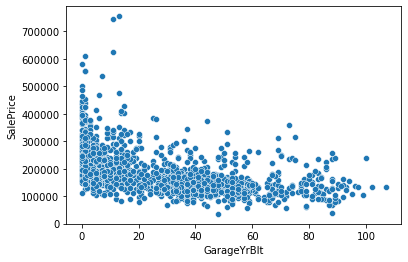

In [36]:
#Here we can analysis of different feature over various year with Sales Price
for feature in year_col:
    data = train_df.copy()
    if feature!='YrSold':
        data[feature] = data['YrSold'] - data[feature]
        
        sns.scatterplot(x = data[feature], y = data['SalePrice'])
        plt.show()

In [44]:
#To find discrete variable

discrete_col = [feature for feature in numercal_col if train_df[feature].nunique() < 25 and feature not in year_col]

discrete_col

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [45]:
len(discrete_col)

17

In [46]:
train_df[discrete_col].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


MSSubClass


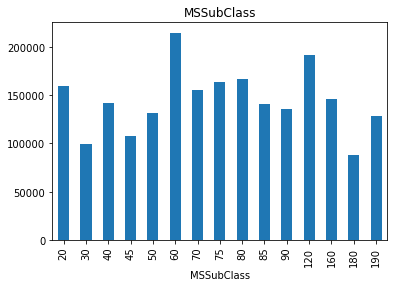

OverallQual


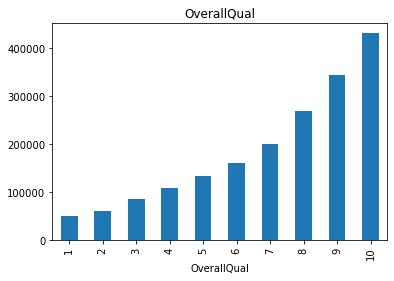

OverallCond


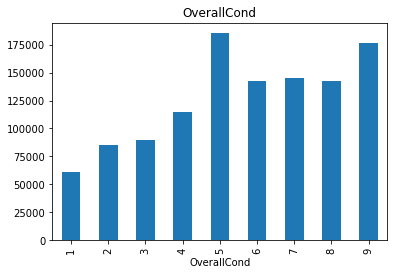

LowQualFinSF


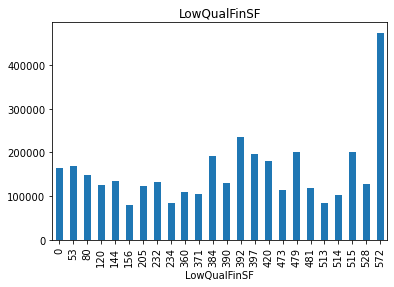

BsmtFullBath


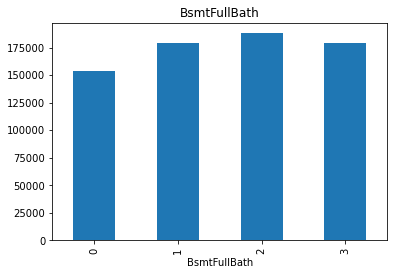

BsmtHalfBath


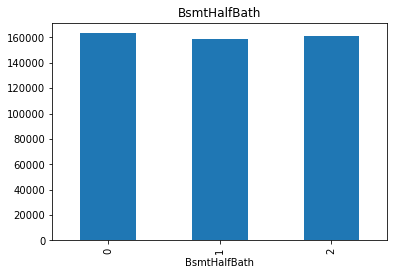

FullBath


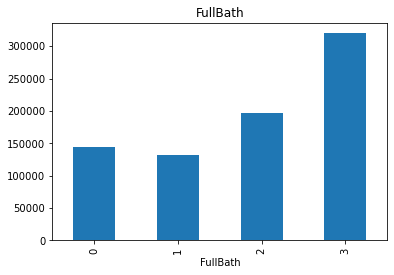

HalfBath


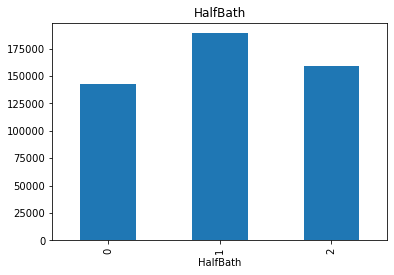

BedroomAbvGr


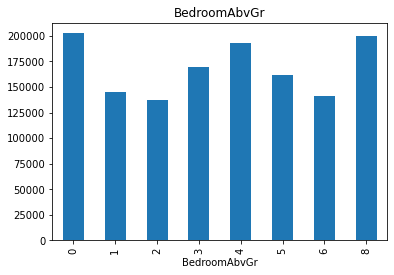

KitchenAbvGr


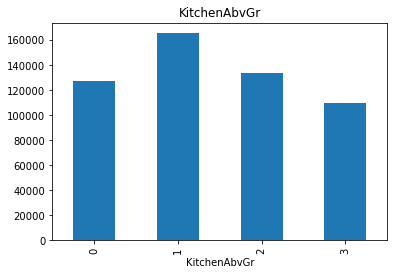

TotRmsAbvGrd


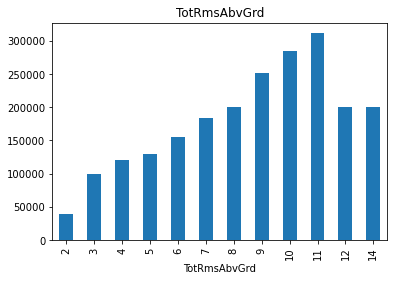

Fireplaces


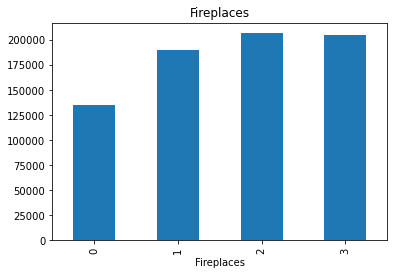

GarageCars


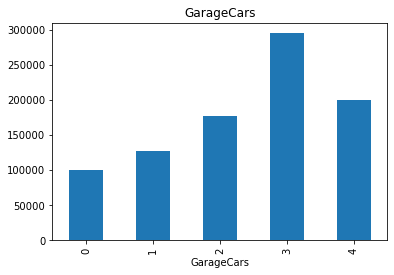

3SsnPorch


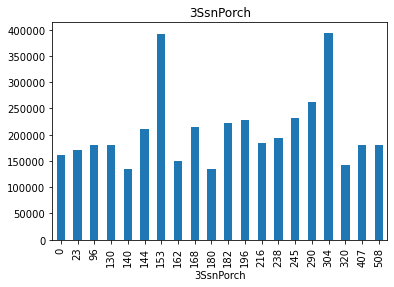

PoolArea


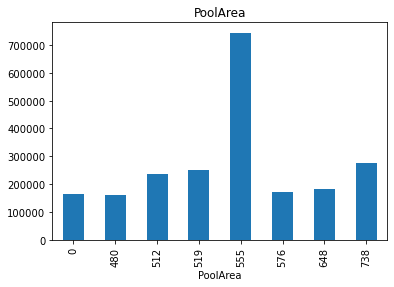

MiscVal


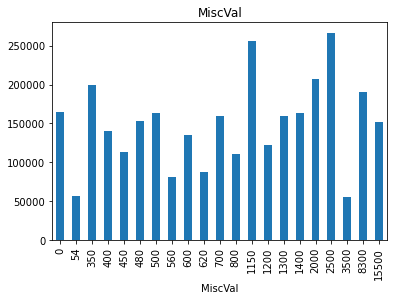

MoSold


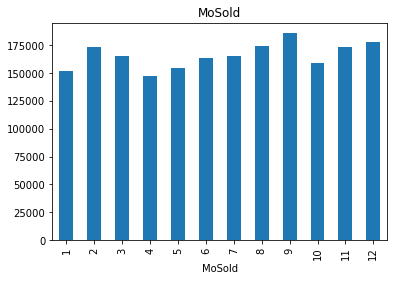

In [51]:
#analysis based on discrete col
for feature in discrete_col:
    print(feature)
    data = train_df.copy()    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

There is a relationship between dicrete variable and Sale Price

In [54]:
#taking continuous variable out

continuous_feature = [feature for feature in numercal_col if feature not in year_col+dicrete_col+['Id']]

continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [55]:
len(continuous_feature)

16

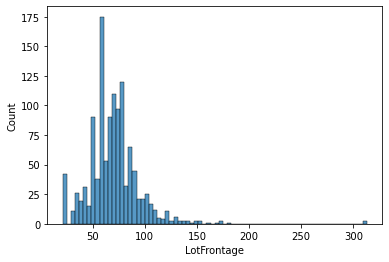

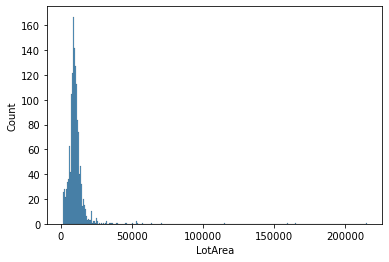

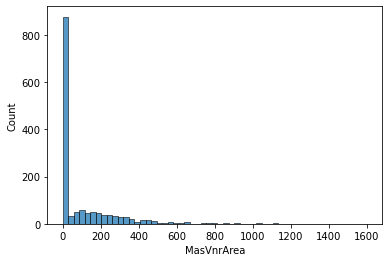

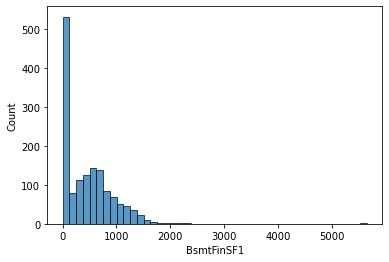

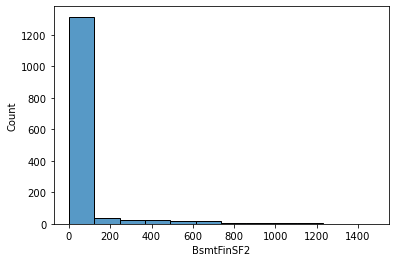

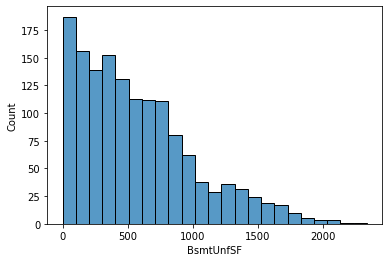

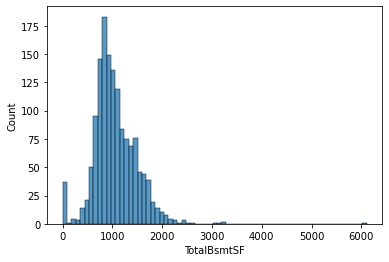

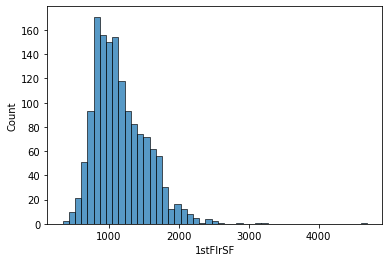

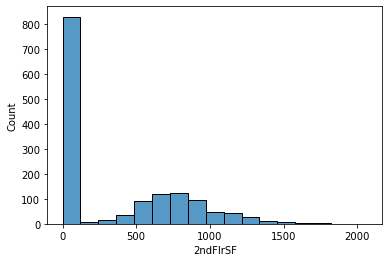

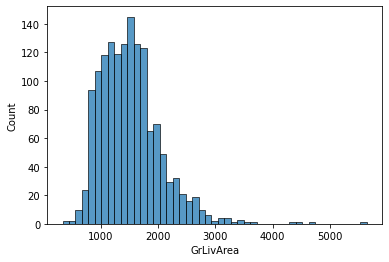

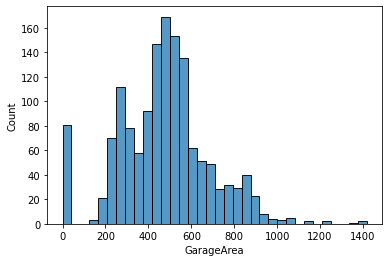

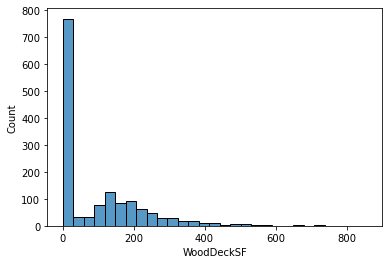

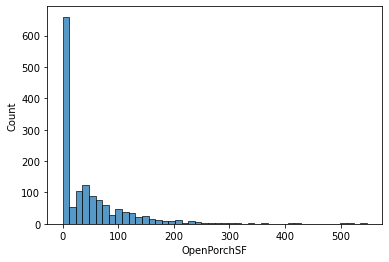

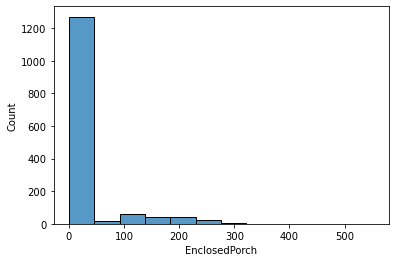

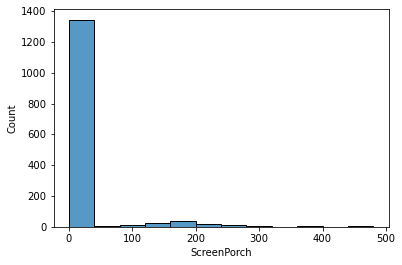

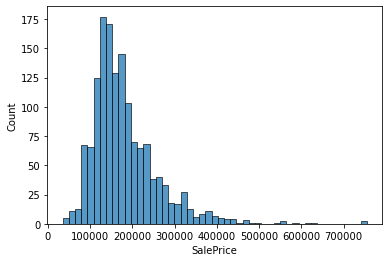

In [56]:
#lets analyse continuous variable using histogram to understand the distribution of data

for feature in continuous_feature:
    data = train_df.copy()
    sns.histplot(data[feature])
    plt.show()

from above analyzes, I can say the most of the continuous feature have not followed Gaussian Distribution,
I will change that to make follow normal distribution.

#### Applying Logarithmic transformation

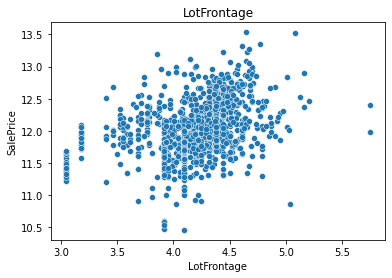

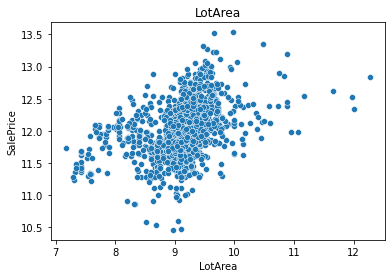

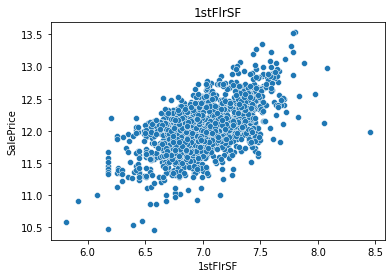

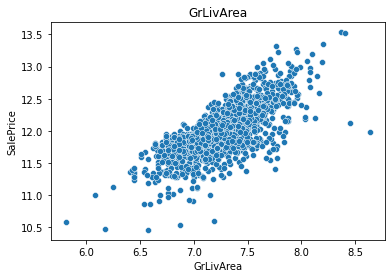

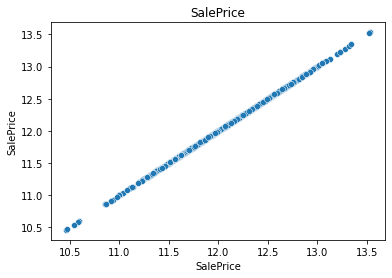

In [65]:
for feature in continuous_feature:
    data = train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(train_df['SalePrice'])
        sns.scatterplot(x = data[feature], y =data['SalePrice'])
        plt.title(feature)
        plt.show()

#### Outliers

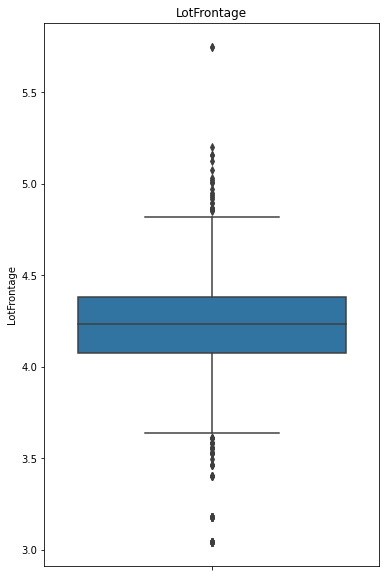

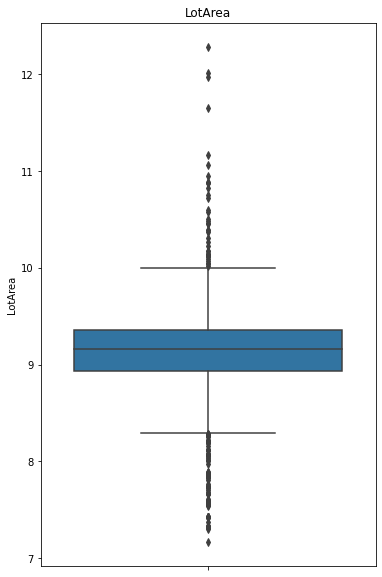

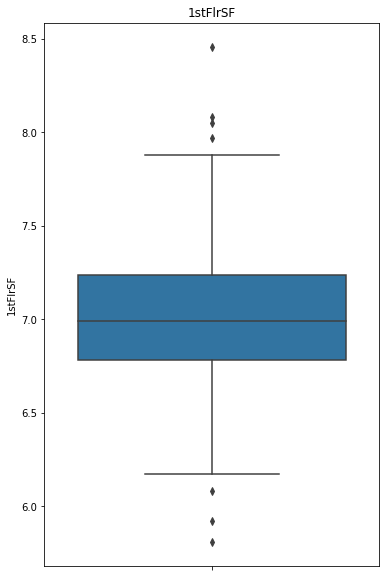

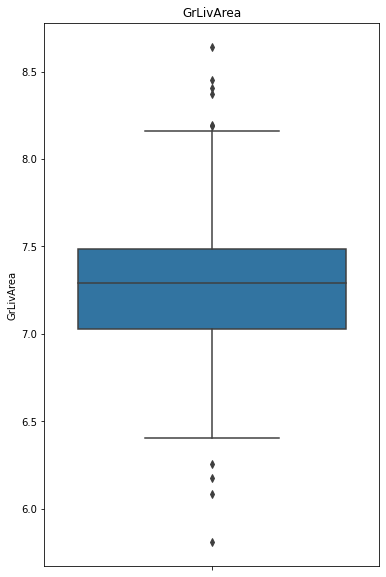

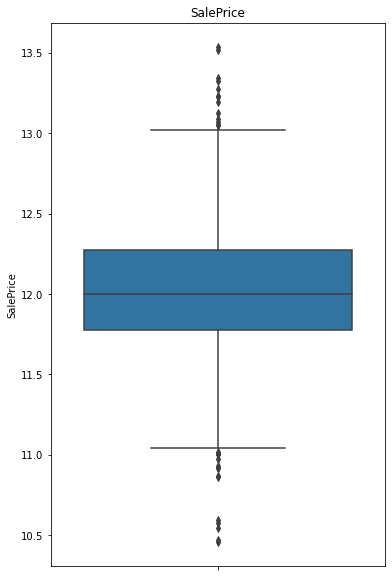

In [70]:
for feature in continuous_feature:
    data = train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature]) 
        plt.figure(figsize=(6,10))
        sns.boxplot(y = data[feature])
        plt.title(feature)
        plt.show()

### Categorical Variables

In [73]:
categorical_feature = train_df.select_dtypes(exclude=np.number).columns

categorical_feature

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [74]:
len(categorical_feature)

43

In [76]:
for feature in categorical_feature:
    print(f'Number of Unique feature of {feature} is {train_df[feature].nunique()}')

Number of Unique feature of MSZoning is 5
Number of Unique feature of Street is 2
Number of Unique feature of Alley is 2
Number of Unique feature of LotShape is 4
Number of Unique feature of LandContour is 4
Number of Unique feature of Utilities is 2
Number of Unique feature of LotConfig is 5
Number of Unique feature of LandSlope is 3
Number of Unique feature of Neighborhood is 25
Number of Unique feature of Condition1 is 9
Number of Unique feature of Condition2 is 8
Number of Unique feature of BldgType is 5
Number of Unique feature of HouseStyle is 8
Number of Unique feature of RoofStyle is 6
Number of Unique feature of RoofMatl is 8
Number of Unique feature of Exterior1st is 15
Number of Unique feature of Exterior2nd is 16
Number of Unique feature of MasVnrType is 4
Number of Unique feature of ExterQual is 4
Number of Unique feature of ExterCond is 5
Number of Unique feature of Foundation is 6
Number of Unique feature of BsmtQual is 4
Number of Unique feature of BsmtCond is 4
Number 

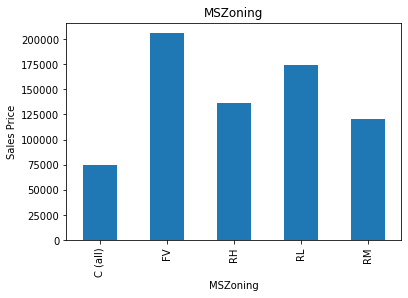

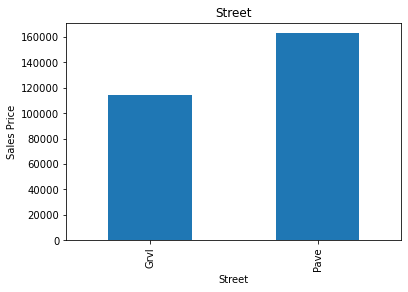

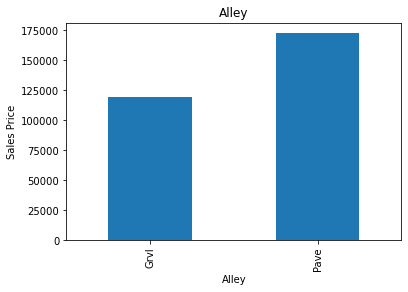

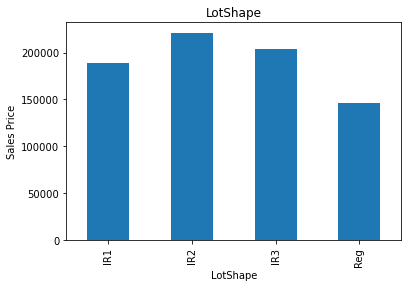

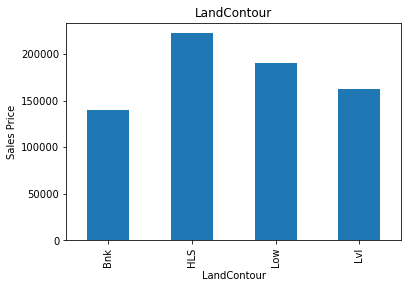

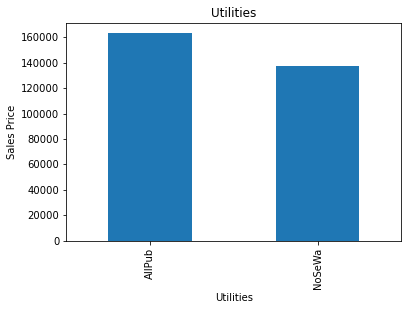

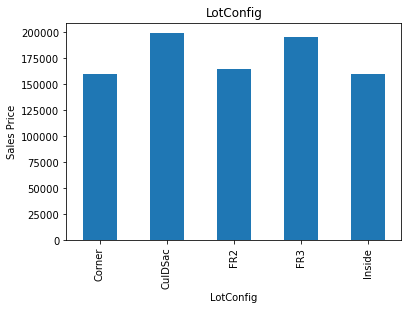

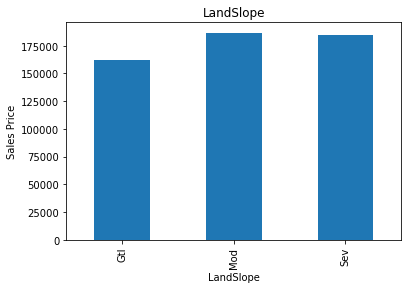

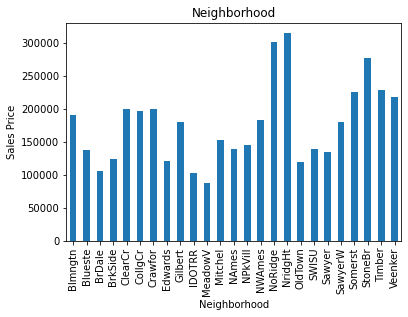

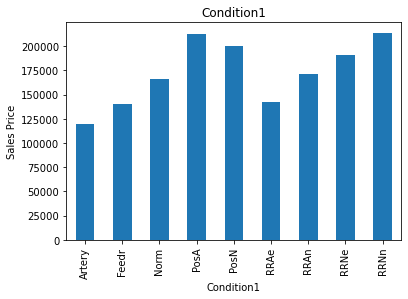

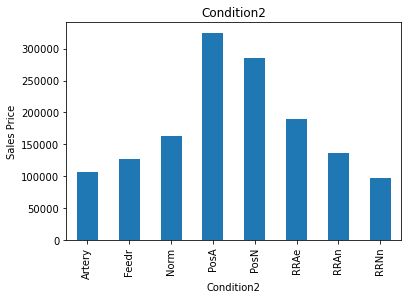

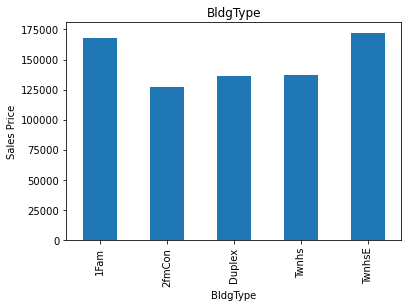

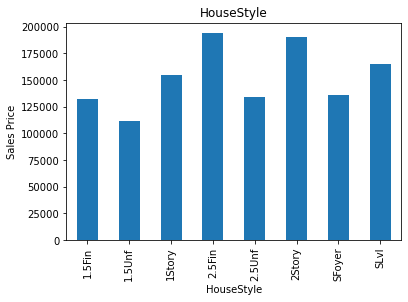

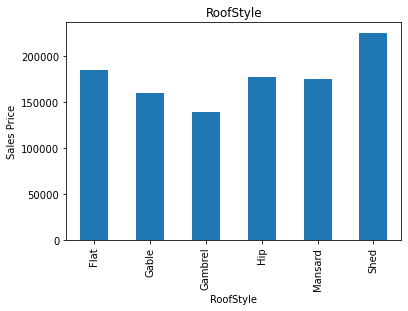

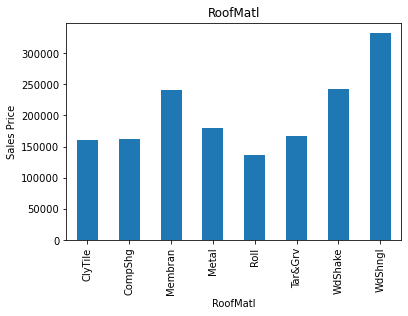

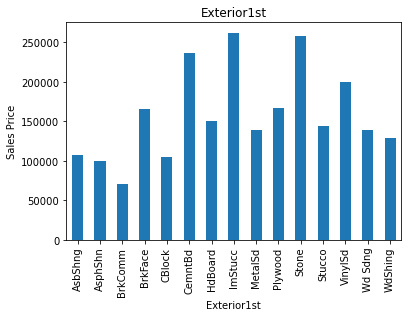

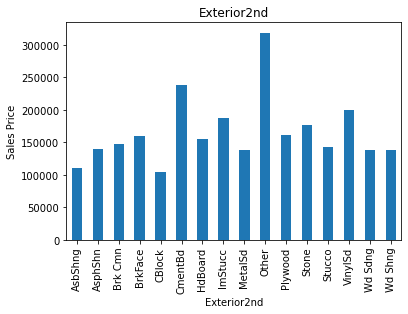

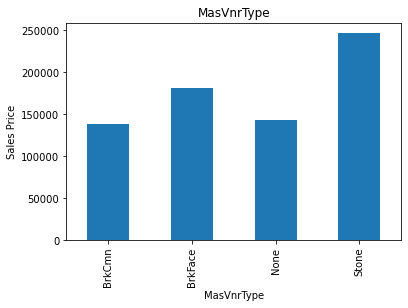

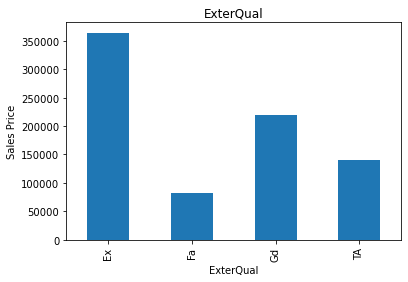

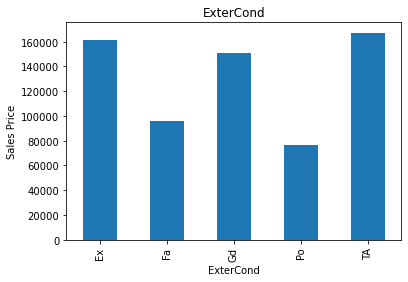

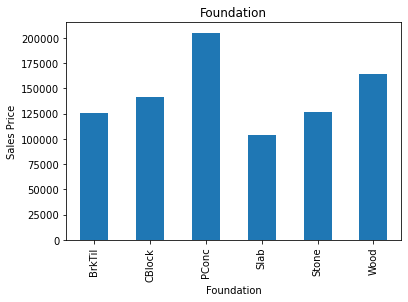

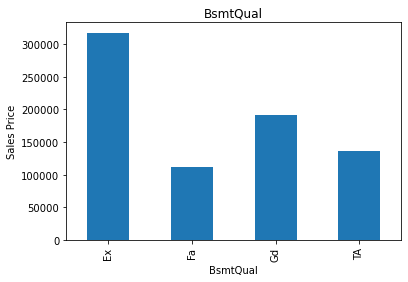

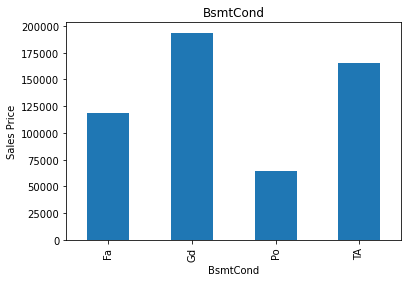

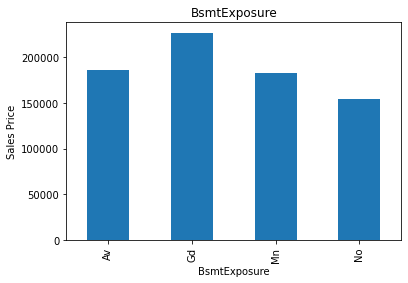

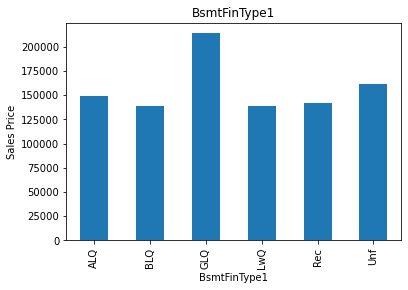

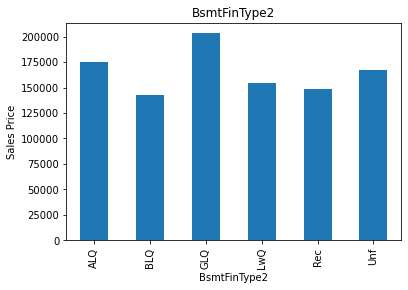

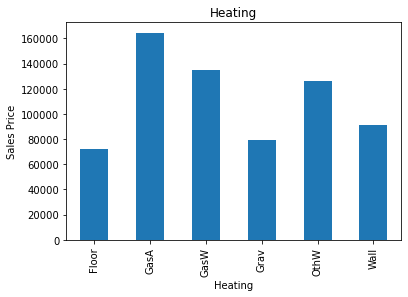

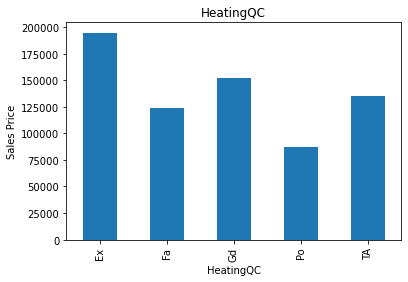

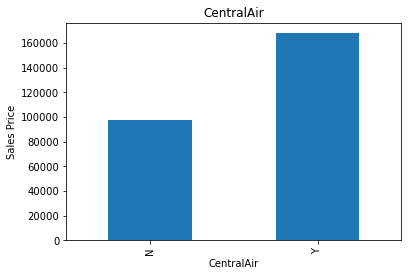

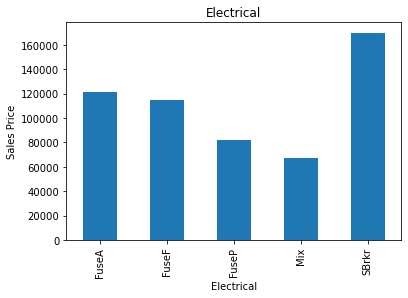

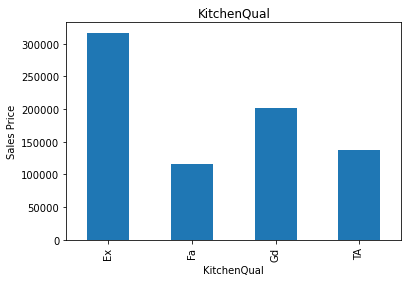

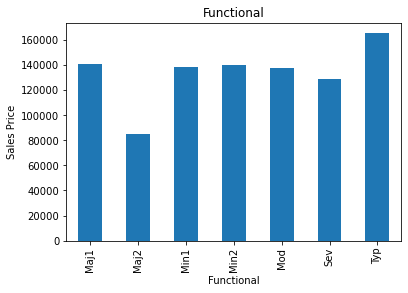

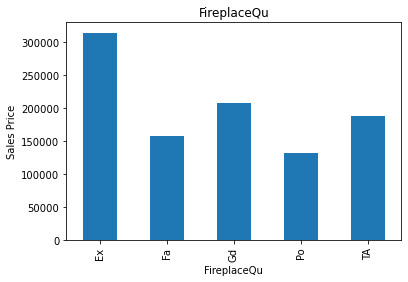

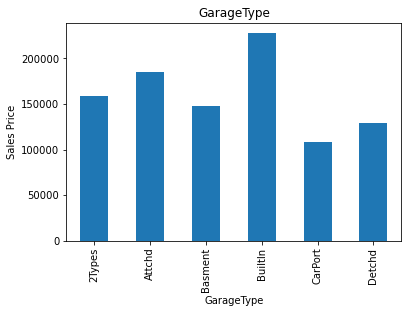

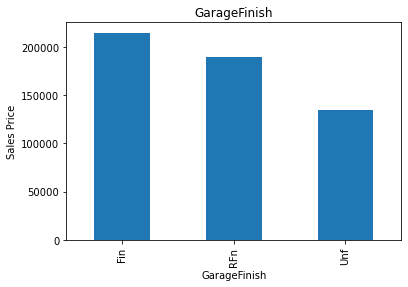

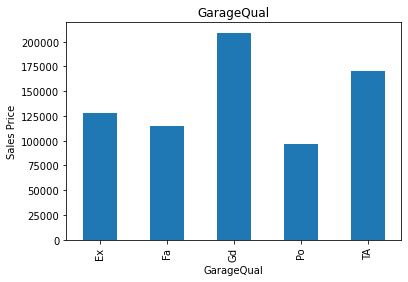

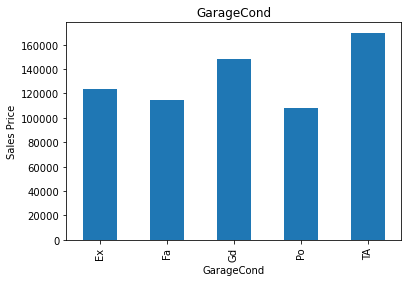

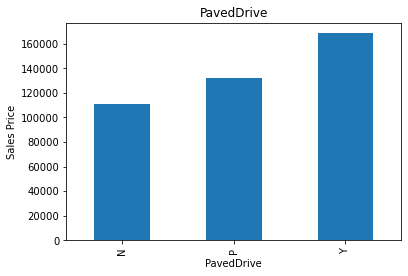

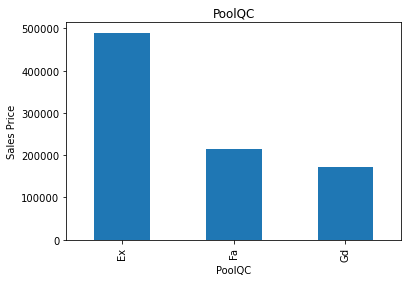

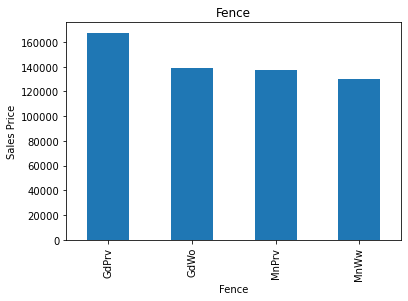

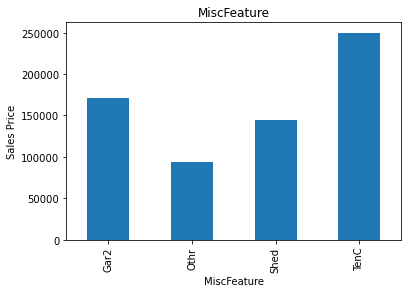

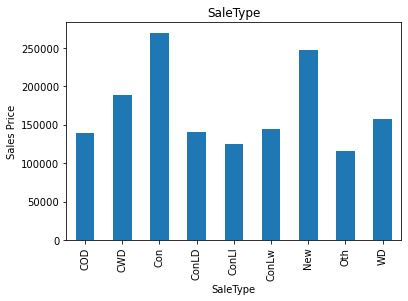

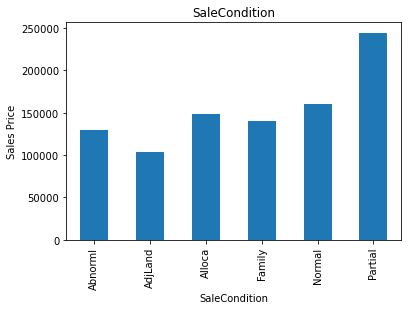

In [77]:
#find out relationship categorical variable and dependent variable

for feature in categorical_feature:
    data = train_df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title(feature)
    plt.show()

### Feature Engineering

In [177]:
test_df = pd.read_csv('test.csv')

sample_df = pd.read_csv('sample_submission.csv')

In [178]:
train_df['Source'] = 'train'

test_df['Source'] = 'test'

train_final_df = pd.concat([train_df, test_df], axis = 0)

In [180]:
train_final_df.shape

(2919, 82)

In [184]:
test_df.isna().sum()[test_df.isna().sum()>1]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

In [185]:
#trying to findout categorical feature's null values
categorical_null=train_final_df[categorical_feature].isna().mean()[train_final_df[categorical_feature].isna().mean()!=0]

categorical_null

MSZoning        0.001370
Alley           0.932169
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinType2    0.027407
Electrical      0.000343
KitchenQual     0.000343
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
PoolQC          0.996574
Fence           0.804385
MiscFeature     0.964029
SaleType        0.000343
dtype: float64

In [186]:
#Replacing missing values with new label
def replace_nan(dataset, features_nan):
    data = dataset.copy()
    for feature in features_nan:
        data[feature] = data[feature].fillna('Missing')
    return data
    
feature_data = replace_nan(train_final_df, categorical_null.index)

In [187]:
feature_data[categorical_null.index].isna().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [188]:
#lets check numerical variable with null values
numerical_null=train_final_df[numercal_col].isna().mean()[train_final_df[numercal_col].isna().mean()!=0]

numerical_null

LotFrontage     0.166495
MasVnrArea      0.007879
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
GarageYrBlt     0.054471
GarageCars      0.000343
GarageArea      0.000343
SalePrice       0.499829
dtype: float64

In [189]:
train_df[numercal_col]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [190]:
for col in numerical_null.index:
    median_val = feature_data[col].median()
    feature_data[col+'nan'] = np.where(feature_data[col].isnull(), 1, 0)
    
    feature_data[col] = feature_data[col].fillna(median_val)

In [191]:
feature_data[numerical_null.index]

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0,140000.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,1979.0,0.0,0.0,163000.0
1455,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.0,1.0,286.0,163000.0
1456,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.0,2.0,576.0,163000.0
1457,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,1979.0,0.0,0.0,163000.0


In [194]:
feature_data.shape

(2919, 94)

In [195]:
# temporal variable
for year in year_col[:3]:
    feature_data[year] = feature_data['YrSold'] - feature_data[year]

In [196]:
feature_data[year_col[:3]]

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0
3,1915,1970,1998.0
4,2000,2000,2000.0
...,...,...,...
1454,1970,1970,1979.0
1455,1970,1970,1970.0
1456,1960,1996,1960.0
1457,1992,1992,1979.0


#### Numerical Variables

since our numerical variables are skewed we will perform logarithmic transformation

In [198]:
continuous_feature[:-1]

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [200]:
#To make our continuous variable column which are not having 0 follow normal distribution. we're doing this
for feature in continuous_feature[:-1]:
    if 0 in data[feature].unique():
        pass
    else:
        feature_data[feature] = np.log(feature_data[feature])

<AxesSubplot:ylabel='Density'>

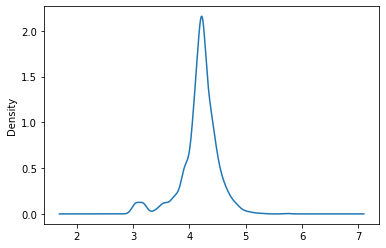

In [201]:
feature_data['LotFrontage'].plot.kde()

<AxesSubplot:ylabel='Density'>

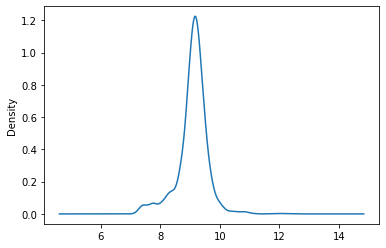

In [202]:
feature_data['LotArea'].plot.kde()

<AxesSubplot:ylabel='Density'>

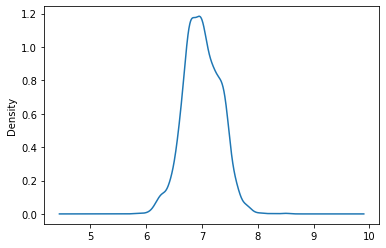

In [203]:
feature_data['1stFlrSF'].plot.kde()

<AxesSubplot:ylabel='Density'>

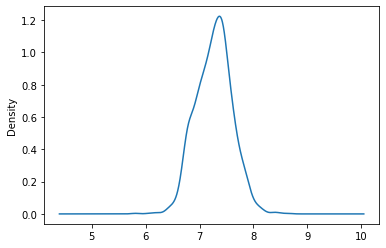

In [119]:
feature_data['GrLivArea'].plot.kde()

<AxesSubplot:ylabel='Density'>

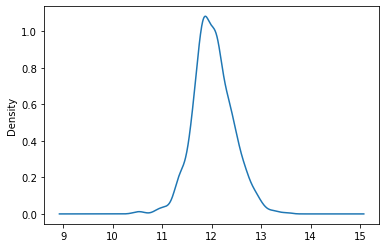

In [120]:
feature_data['SalePrice'].plot.kde()

### Handling Rare Categorical feature

In [204]:
for feature in categorical_feature:
    temp = feature_data.groupby(feature)['SalePrice'].count()/len(feature_data)
   
    temp_df = temp[temp>0.01].index
    
    feature_data[feature] = np.where(feature_data[feature].isin(temp_df), feature_data[feature],'Rare_var')
    

In [248]:
feature_data.Source

0       train
1       train
2       train
3       train
4       train
        ...  
2914     test
2915     test
2916     test
2917     test
2918     test
Name: Source, Length: 2919, dtype: object

In [208]:
feature_data.iloc

Id                       94
MSSubClass              190
MSZoning           Rare_var
LotFrontage        4.094345
LotArea            8.881836
                     ...   
BsmtHalfBathnan           0
GarageYrBltnan            0
GarageCarsnan             0
GarageAreanan             0
SalePricenan              0
Name: 93, Length: 94, dtype: object

### Feature Scaling

In [209]:
numerical_scale = numercal_col[1:-1]

In [210]:
numerical_scale

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [259]:
sc = MinMaxScaler()

scale_data = pd.DataFrame(sc.fit_transform(feature_data[numerical_scale]), columns = numerical_scale) 

In [260]:
scale_data.index

RangeIndex(start=0, stop=2919, step=1)

In [261]:
scale_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.418208,0.366344,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.4,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.000000,0.090909,0.50
1,0.000000,0.495064,0.391317,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.4,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.363636,0.25
2,0.235294,0.434909,0.422359,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.4,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.50
3,0.294118,0.388581,0.390295,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.6,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.000000,0.090909,0.00
4,0.235294,0.513123,0.468761,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.6,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,0.000000,0.077946,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.0,0.233733,0.089362,0.180367,0.264407,0.0,0.419061,0.000000,0.0,0.25,0.5,0.375,0.333333,0.230769,0.00,0.269231,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.454545,0.00
2915,0.823529,0.000000,0.073654,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.0,0.125856,0.089362,0.180367,0.264407,0.0,0.419061,0.000000,0.0,0.25,0.5,0.375,0.333333,0.307692,0.00,0.240385,0.2,0.192204,0.000000,0.032345,0.000000,0.0,0.0,0.0,0.000000,0.272727,0.00
2916,0.000000,0.751625,0.534967,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.0,0.000000,0.200327,0.476623,0.000000,0.0,0.459429,0.333333,0.0,0.25,0.0,0.500,0.333333,0.384615,0.25,0.208333,0.4,0.387097,0.332865,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.00
2917,0.382353,0.400718,0.407753,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.0,0.246147,0.149264,0.391268,0.000000,0.0,0.377153,0.000000,0.5,0.25,0.0,0.375,0.333333,0.307692,0.00,0.269231,0.0,0.000000,0.056180,0.043127,0.000000,0.0,0.0,0.0,0.041176,0.545455,0.00


In [262]:
feature_data.reset_index(drop=True, inplace=True)

In [265]:
data_num = pd.concat([scale_data, feature_data[['Id', 'SalePrice', 'Source']]], axis = 1)

In [266]:
data_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Id,SalePrice,Source
0,0.235294,0.418208,0.366344,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.4,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.000000,0.090909,0.50,1,208500.0,train
1,0.000000,0.495064,0.391317,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.4,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.363636,0.25,2,181500.0,train
2,0.235294,0.434909,0.422359,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.4,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.50,3,223500.0,train
3,0.294118,0.388581,0.390295,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.6,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.000000,0.090909,0.00,4,140000.0,train
4,0.235294,0.513123,0.468761,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.6,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.50,5,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,0.000000,0.077946,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.0,0.233733,0.089362,0.180367,0.264407,0.0,0.419061,0.000000,0.0,0.25,0.5,0.375,0.333333,0.230769,0.00,0.269231,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.454545,0.00,2915,163000.0,test
2915,0.823529,0.000000,0.073654,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.0,0.125856,0.089362,0.180367,0.264407,0.0,0.419061,0.000000,0.0,0.25,0.5,0.375,0.333333,0.307692,0.00,0.240385,0.2,0.192204,0.000000,0.032345,0.000000,0.0,0.0,0.0,0.000000,0.272727,0.00,2916,163000.0,test
2916,0.000000,0.751625,0.534967,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.0,0.000000,0.200327,0.476623,0.000000,0.0,0.459429,0.333333,0.0,0.25,0.0,0.500,0.333333,0.384615,0.25,0.208333,0.4,0.387097,0.332865,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.00,2917,163000.0,test
2917,0.382353,0.400718,0.407753,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.0,0.246147,0.149264,0.391268,0.000000,0.0,0.377153,0.000000,0.5,0.25,0.0,0.375,0.333333,0.307692,0.00,0.269231,0.0,0.000000,0.056180,0.043127,0.000000,0.0,0.0,0.0,0.041176,0.545455,0.00,2918,163000.0,test


In [267]:
categorical_feature

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [268]:
dummy_data = pd.get_dummies(feature_data[categorical_feature], drop_first=True)

In [269]:
dummy_data.shape

(2919, 167)

In [270]:
data_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Id,SalePrice,Source
0,0.235294,0.418208,0.366344,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.4,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.000000,0.090909,0.50,1,208500.0,train
1,0.000000,0.495064,0.391317,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.4,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.363636,0.25,2,181500.0,train
2,0.235294,0.434909,0.422359,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.4,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.50,3,223500.0,train
3,0.294118,0.388581,0.390295,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.6,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.000000,0.090909,0.00,4,140000.0,train
4,0.235294,0.513123,0.468761,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.6,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.50,5,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,0.000000,0.077946,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.0,0.233733,0.089362,0.180367,0.264407,0.0,0.419061,0.000000,0.0,0.25,0.5,0.375,0.333333,0.230769,0.00,0.269231,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.454545,0.00,2915,163000.0,test
2915,0.823529,0.000000,0.073654,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.0,0.125856,0.089362,0.180367,0.264407,0.0,0.419061,0.000000,0.0,0.25,0.5,0.375,0.333333,0.307692,0.00,0.240385,0.2,0.192204,0.000000,0.032345,0.000000,0.0,0.0,0.0,0.000000,0.272727,0.00,2916,163000.0,test
2916,0.000000,0.751625,0.534967,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.0,0.000000,0.200327,0.476623,0.000000,0.0,0.459429,0.333333,0.0,0.25,0.0,0.500,0.333333,0.384615,0.25,0.208333,0.4,0.387097,0.332865,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.00,2917,163000.0,test
2917,0.382353,0.400718,0.407753,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.0,0.246147,0.149264,0.391268,0.000000,0.0,0.377153,0.000000,0.5,0.25,0.0,0.375,0.333333,0.307692,0.00,0.269231,0.0,0.000000,0.056180,0.043127,0.000000,0.0,0.0,0.0,0.041176,0.545455,0.00,2918,163000.0,test


In [271]:
data_final = pd.concat([data_num, dummy_data ], axis = 1)

In [276]:
train_data = data_final[data_final['Source'] == 'train']

test_data = data_final[data_final['Source'] == 'test']

In [281]:
X = pd.concat([X_train, X_test])

y = pd.concat([y_train, y_test])

In [315]:
X_train = train_data.drop(['Source', 'SalePrice'], axis = 1)

y_train = train_data['SalePrice']

X_test = test_data.drop(['Source', 'SalePrice'], axis = 1)

y_test = test_data['SalePrice']

In [325]:
y_test

1460    163000.0
1461    163000.0
1462    163000.0
1463    163000.0
1464    163000.0
          ...   
2914    163000.0
2915    163000.0
2916    163000.0
2917    163000.0
2918    163000.0
Name: SalePrice, Length: 1459, dtype: float64

In [273]:
 data_num.to_csv('Train_preprocess_final.csv', index= False)

In [145]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.feature_selection import SelectFromModel

In [237]:
X = data_final.drop(['SalePrice'], axis =1)

y = data_final['SalePrice']

In [238]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914    163000.0
2915    163000.0
2916    163000.0
2917    163000.0
2918    163000.0
Name: SalePrice, Length: 2919, dtype: float64

In [332]:
ls = Lasso(alpha = 40, random_state=0)

feature_selection = SelectFromModel(ls)

In [333]:
feature_selection.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=40, random_state=0))

In [334]:
selected_features = X.columns[feature_selection.get_support()]

In [335]:
print(f'total features: {len(X.columns)}')
print(f'No. of Columns Selected {selected_features.shape[0]}')

total features: 204
No. of Columns Selected 132


In [336]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [337]:
train_pred = lm.predict(X_train)


In [338]:
from sklearn import metrics

In [340]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R2 Score:', metrics.r2_score(y_train, train_pred))

Mean Absolute Error: 15532.282374701024
Mean Squared Error: 620960310.7676451
Root Mean Squared Error: 24919.07523901409
R2 Score: 0.9015409661566682


<AxesSubplot:xlabel='SalePrice'>

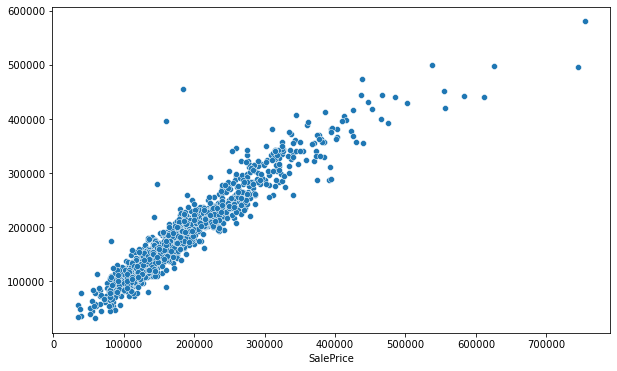

In [343]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_train, y = train_pred)

In [323]:
test_pred = lm.predict(X_test)

In [329]:
sample_df['SalePrice'] = test_pred

In [331]:
sample_df.to_csv('Final Pred.csv', index=False)